<img src="img/header_escom26.jpg" alt="header" style="height:200px;">

# Metodo de Ostu
**Mothelet Delgado Izaird Alexander**




La binarización de una imagen consiste en un proceso de reducción de la información de la misma, en la que sólo persisten dos valores: verdadero y falso. En una imagen digital, estos valores, verdadero y falso, pueden representarse por los valores 0 y 1 o, más frecuentemente, por los colores negro (0) y blanco (255).

En el proceso y análisis de imagen, la binarización se emplea para separar las regiones u objetos de interés en una imagen del resto. Las imágenes binarias se usan en operaciones booleanas o lógicas para identificar individualmente objetos de interés o para crear máscaras sobre regiones.
#### Umbralizacion
La umbralización es uno de los más importantes métodos de segmentación. El objetivo es convertir una imagen en escala de grises a una nueva con sólo dos niveles, de manera que los objetos queden separados del fondo. Para poder  lograr esto debemos de escoger un umbral en el que el objeto se pueda separar facilmente del fondo. Necesitaremos un umbral de referencia con el que se decidira que partes de la imagen son fondo y cuales son la actual figura. Este umbral se puede conseguir solo probando y adivinando, o una mejor forma seria analizando el histograma de la imagen asi que es lo primero que haremos.

Importaremos las librerias que usaremos, crearemos una funcion para la binarizacion y para la muestra del histograma

In [1]:
import math
import numpy as np
from matplotlib import pyplot as plt
from PIL import Image


def hist(img):
    row, col = img.shape 
    y = np.zeros(256)
    for i in range(0,row):
        for j in range(0,col):
            y[img[i,j]] += 1
    hist,bins = np.histogram(img,256,[0,256])
    plt.hist(img.ravel(),256,[0,256])
    plt.title('Histogram for gray scale picture')
    plt.show()
    return y

def regenerate_img(img, threshold):
    height = img.shape[0]
    width = img.shape[1]
    hw = height * width
    img_bin = img.copy()
    img_bin = np.reshape(img_bin,hw)
    for i in range(0, hw):
        if img_bin[i]<threshold:
            img_bin[i] = 0
        else:
            img_bin[i] = 255
    img_bin = np.reshape(img_bin,(height, width))
    return img_bin


Una vez que tenemos lo que necesitamos vamos a abrir nuestra imagen

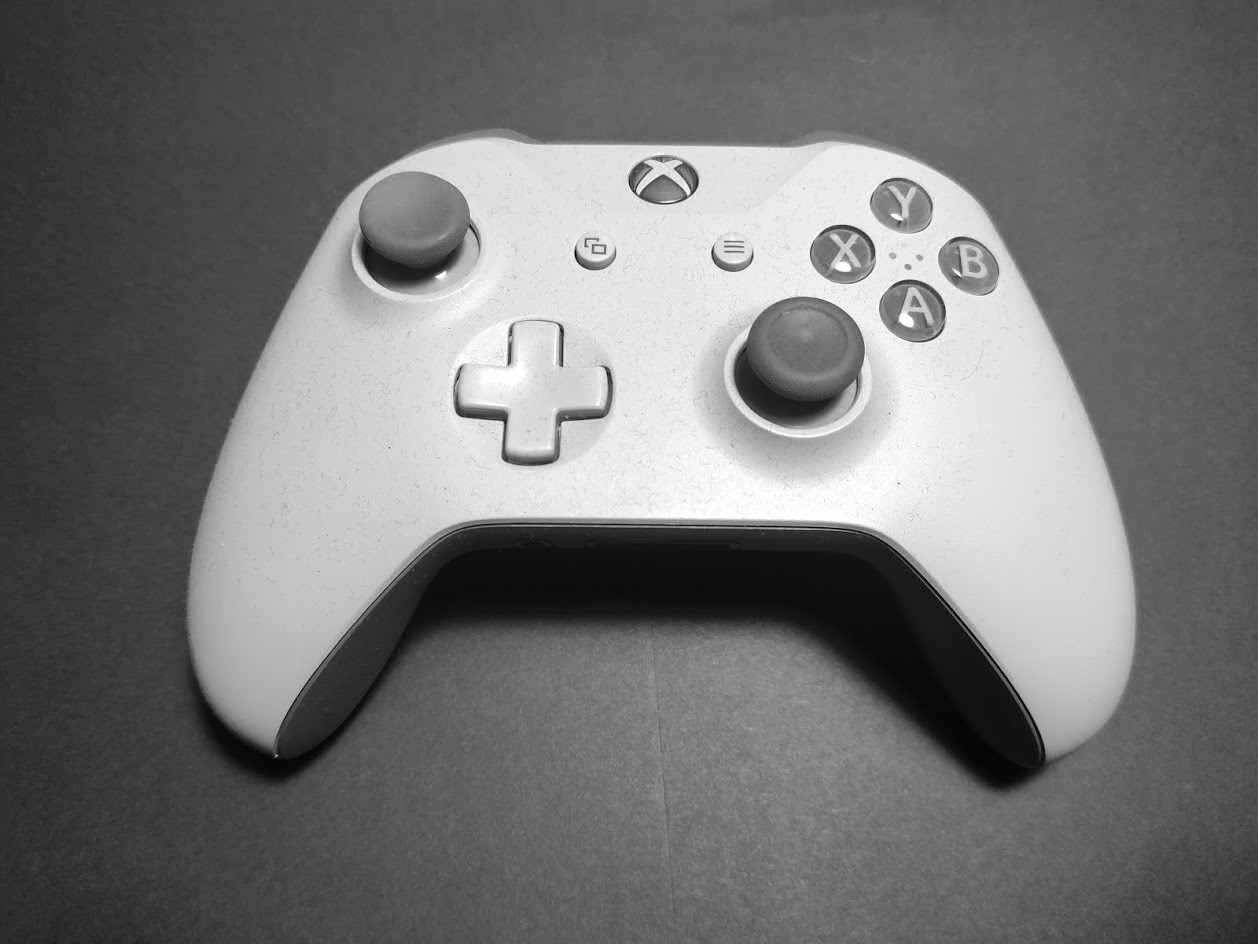

In [2]:
filepath="img/" #The current directory
#filename="mark.jpeg" #The File name
filename="img_01.jpg"
pic=Image.open(filepath+filename).convert("L") #Open the image and convert to gray scale 
pic #Diplays the image in the notebook

Ahora necesitamos convertir la imagen en algo que sea algo mas facil de manejar algo como un array

In [3]:
pic_arr = np.asarray(pic) #converts the image to an Numpy Array
pic_arr.shape #(height,width,#of channels)

(944, 1258)

Aqui como podemos observar al tratarse de una imagen en escala de grises nos emos desecho del canal RGB, una vez echo esto procedemos a mostrar el histograma de la figura, en este primer ejemplo he tomado una foto con un fondo negro para que sea facil ver en el histograma como se separa en dos grandes cumulos, este tipo de histogramas es tambien conocido como "histograma bimodal"

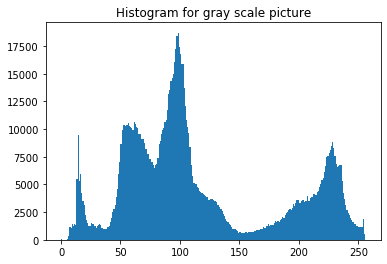

In [4]:
h = hist(pic_arr)

Como se puede observar la separacion entre ambos cumulos es aproximadamente en el punto 150 del eje x asi que ese sera nuestro umbral que usaremos para la binarizacion

Wall time: 1.46 s


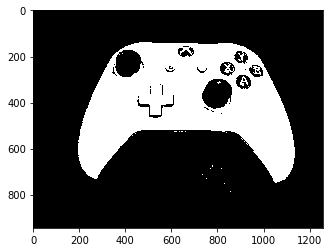

In [5]:
%time img_bin_01 = regenerate_img(pic_arr, 150)
plt.imshow(img_bin_01,cmap=plt.cm.gray) # We use cmap so that the binary image is shown only with black and white

Como podemos ver gracias a que histograma es bimodal pudimos escoger un umbral bastante correcto que nos muestra de una manera bastante acertada solo el objeto teniendo casi todo el fondo de color negro. ¿Pero que es lo que pasa cuando el histograma no es bimodal y no podemos encontrar de manera sencilla el umbral?

Veamos la siguiente imagen.

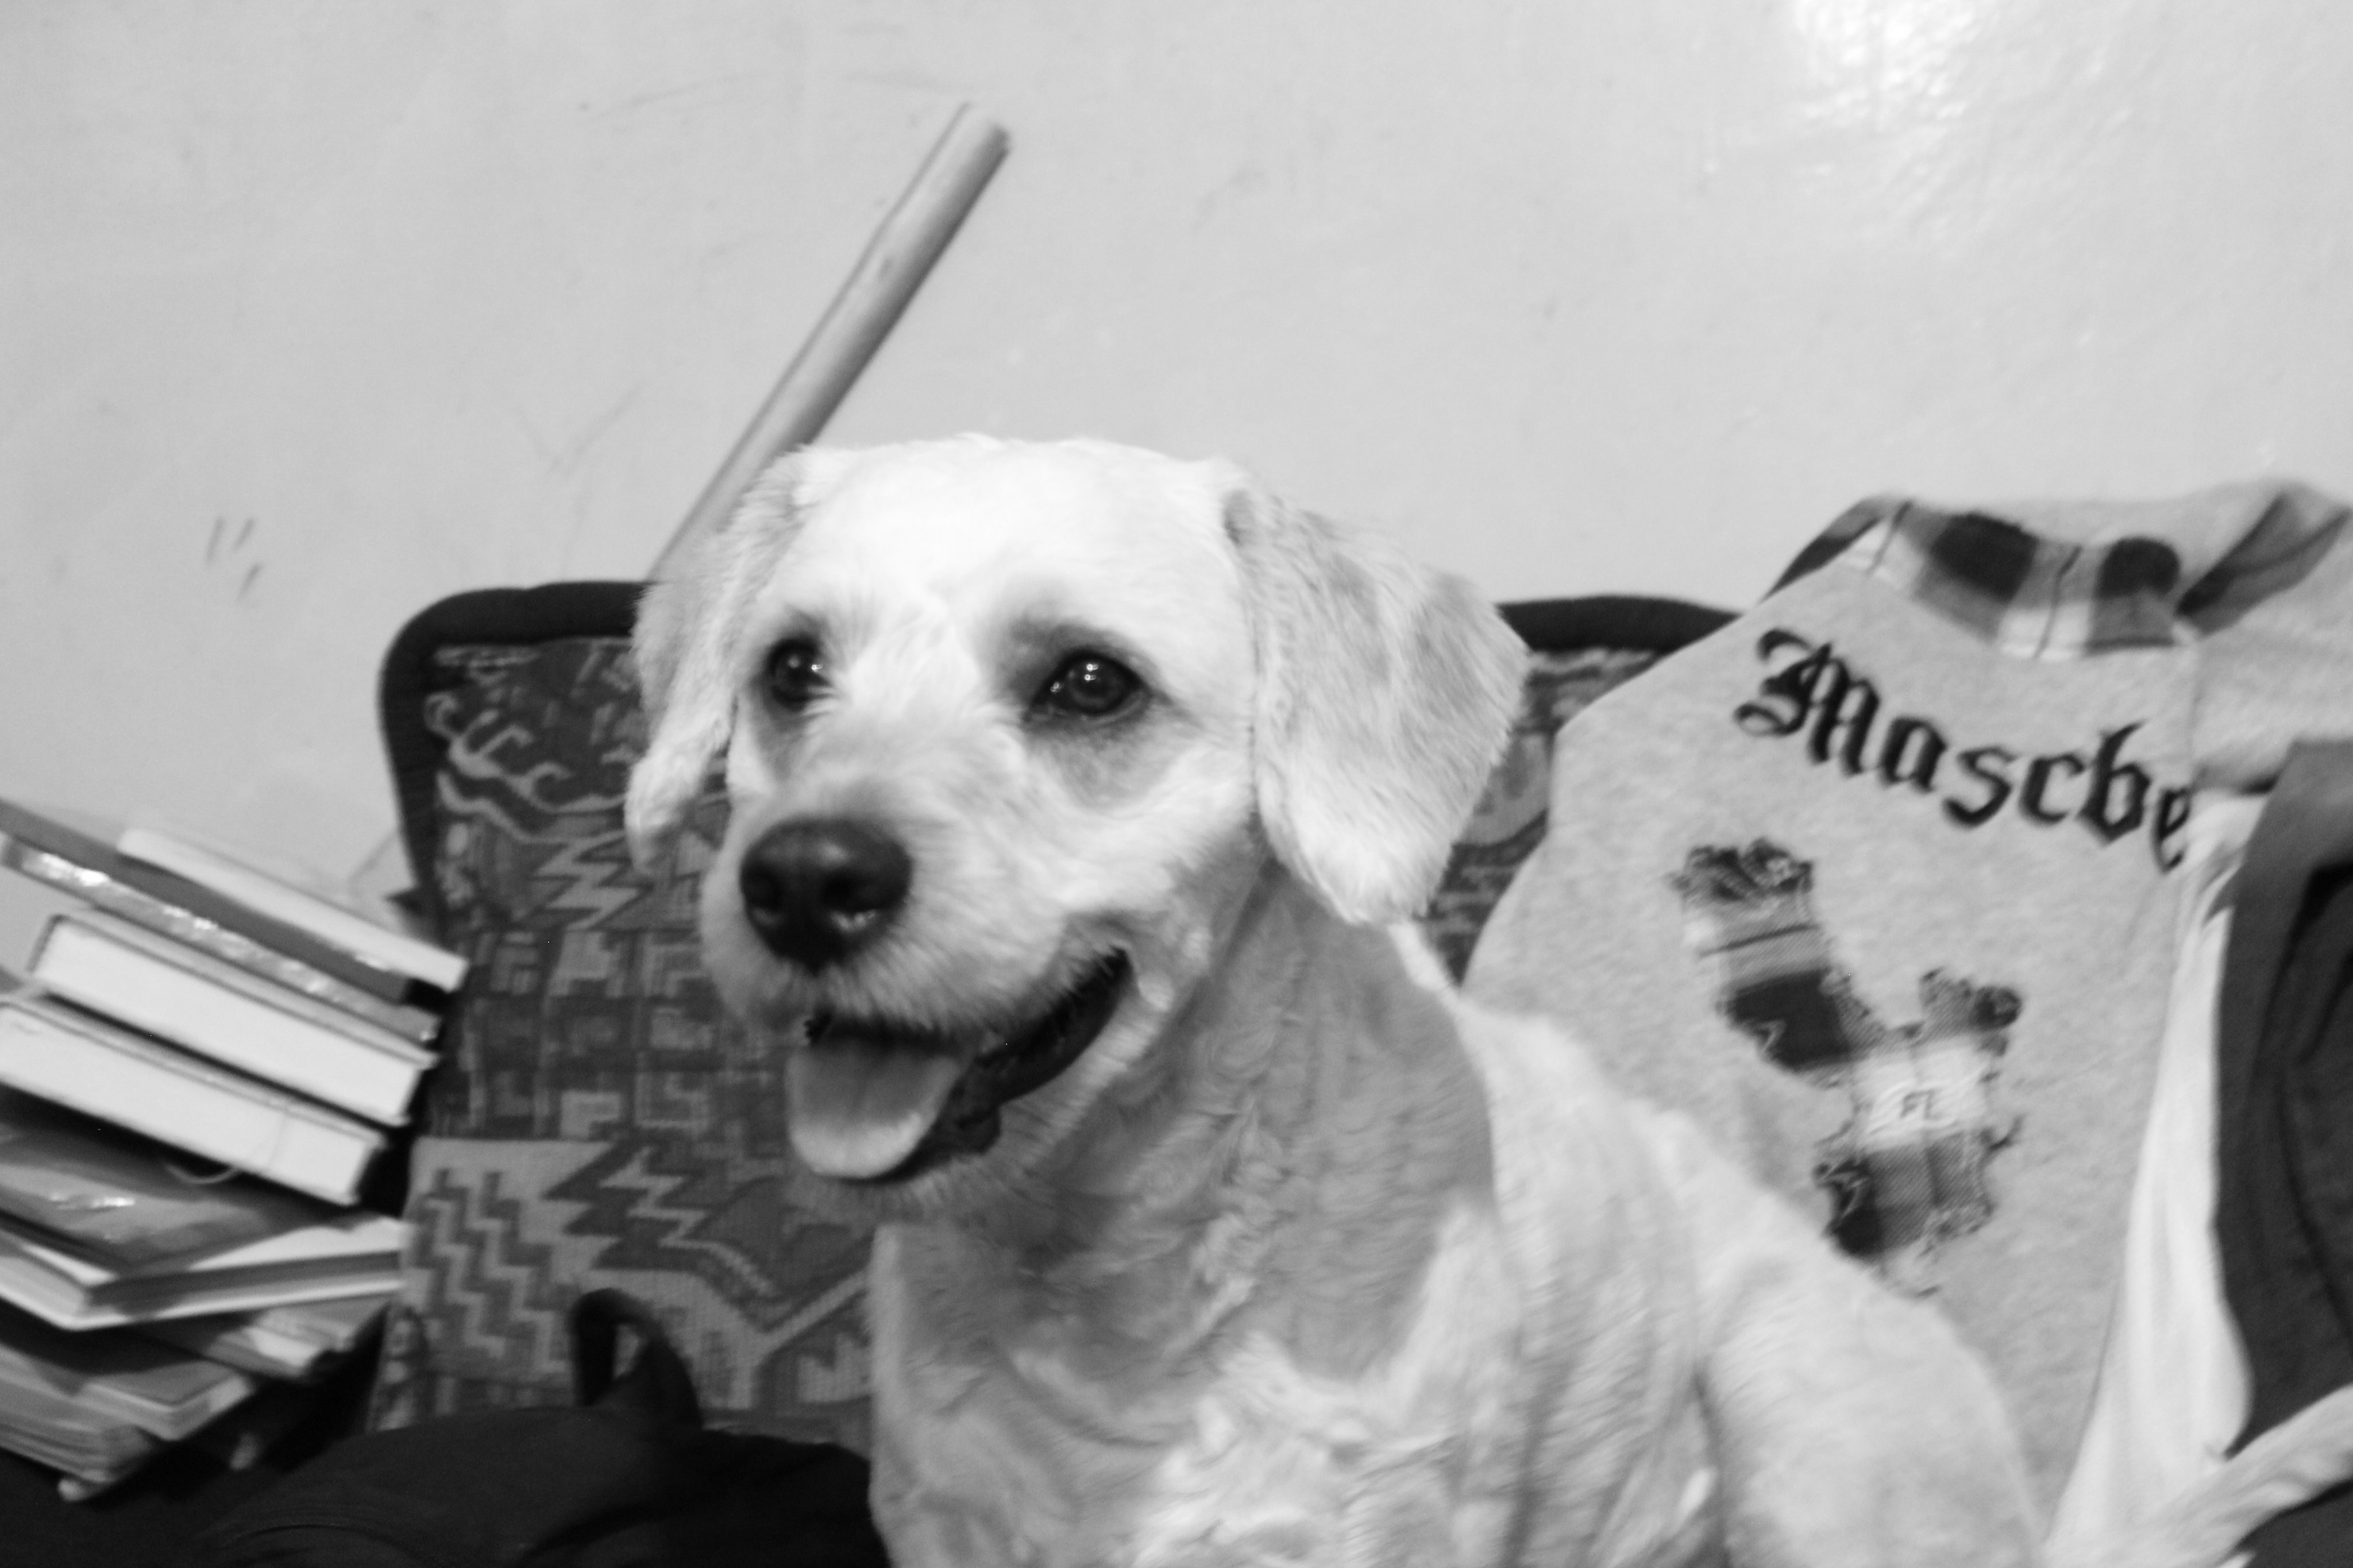

In [6]:
filename="img_02.jpg"
pic=Image.open(filepath+filename).convert("L")
pic

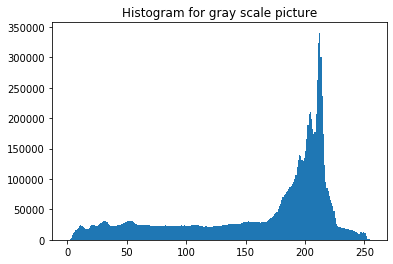

In [7]:
pic_arr = np.asarray(pic)
pic_arr.shape 
h = hist(pic_arr)

Como podemos ver aqui este histograma no es bimodal, es mas bien sesgado negativo y de aqui no sera tan facil obtener el umbral. pero para eso es que tenemos el metdoo de Otsu que nos ayudara a encontrar el "umbral optimo".

Para hacer esto calcula el valor umbral de forma que la dispersión dentro de cada clase sea lo más pequeña posible, pero al mismo tiempo la dispersión sea lo más alta posible entre clases diferentes.

Asi que creamos nuestras funciones para calcular cosas como la variancia, la diferencia entre clases y asi poder calcular el umbral optimo

In [8]:
def countPixel(h):
    cnt = 0
    for i in range(0, len(h)):
        if h[i]>0:
            cnt += h[i]
    return cnt

def wieght(s, e):
    w = 0
    for i in range(s, e):
        w += h[i]
    return w

def mean(s, e):
    m = 0
    w = wieght(s, e)
    for i in range(s, e):
        m += h[i] * i
    
    return m/float(w)

def variance(s, e):
    v = 0
    m = mean(s, e)
    w = wieght(s, e)
    for i in range(s, e):
        v += ((i - m) **2) * h[i]
    v /= w
    return v
            
def threshold(h):
    cnt = countPixel(h)
    for i in range(1, len(h)):
        vb = variance(0, i)
        wb = wieght(0, i) / float(cnt)
        vf = variance(i, len(h))
        wf = wieght(i, len(h)) / float(cnt)
        V2w = wb * (vb) + wf * (vf)
        if not math.isnan(V2w):
            threshold_values[i] = V2w

def get_optimal_threshold():
    min_V2w = min(threshold_values.values())
    optimal_threshold = [k for k, v in threshold_values.items() if v == min_V2w]
    print('optimal threshold', optimal_threshold[0])
    return optimal_threshold[0]

threshold_values = {}#This is where we will store all class variations

Una vez que terminamos solo tenemos que usar el metodo otsu para calcular el  "umbral optimo".

optimal threshold 133


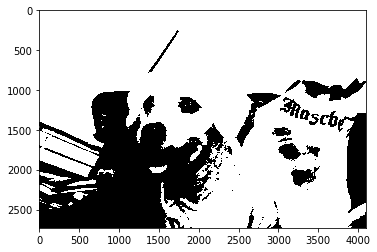

In [9]:
threshold(h)
op_thres = get_optimal_threshold()
res = regenerate_img(pic_arr, op_thres)
plt.imshow(res,cmap=plt.cm.gray) 

In [10]:
len(h)

256